In [ ]:
import matplotlib.pyplot
%matplotlib inline

In [ ]:
matplotlib.pyplot.imshow(a, interpolation="nearest")

In [ ]:
data_file = open("mnist_dataset/mnist_test.csv", 'r')
data_list = data_file.readlines()
data_file.close()

In [ ]:
data_file2 = open("mnist_dataset/mnist_train_100.csv", 'r')
data_list2 = data_file2.readlines()
data_file2.close()

In [ ]:
len(data_list2)

In [ ]:
import numpy
import matplotlib.pyplot
%matplotlib inline  

# split each charact
# er by each comma, and make own string
all_values = data_list2[1].split(',')


# converts pixel values into from strings to float since needed in numeric format to do computation

# reshape transforms original 28x28 pixels into 28x28 2D array
image_array = numpy.asfarray(all_values[1:]).reshape((28, 28))


# plots image_array using imshow() function with greyscale colour palatte cmap = 'Greys'
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None') #

print(all_values)

In [ ]:
data_list2[0]
# Fist # is 5, rest of numbers are colour values for the pixels that make up the image.

In [ ]:
# asfarray converts strings in all_values into float to process in 2D array,
# excluding label and including pixel values

# divides each pixel value by 255. 
# Since the original values are in the range of 0 to 255, this
# scales them to the range of 0 to 1
# then multiplies each of the now normalized pixel values by 0.99. 
# this further scales the values to the range of 0 to 0.99.
# adds 0.01 to each scaled value. This final adjustment shifts the range from 0-0.99 to 0.01-1.00. 

scaled_input = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01

print(scaled_input)

In [ ]:
import numpy
import scipy.special
class neuralNetwork:

    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        # link weight matricies, wih and who
        # weights inside arrrays are w_i_j, where link is 
        # from node i to node j in the next layer
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # learning rate
        self.lr = learningrate

        # activation function
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass

    # train neural network
    def train(self, input_list, target_list):
        
        # convert inputs list to 2d array
        inputs = numpy.array(input_list, ndmin=2).T
        targets = numpy.array(target_list, ndmin=2).T

        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)

        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)

        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)

        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)

        # output layer error is the (target - actual)
        output_errors = targets - final_outputs

        # hidden layer error is the output_errors, split by weights,
        # recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors)

        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot(
            (output_errors * final_outputs * (1.0 - final_outputs)), 
            numpy.transpose((hidden_outputs))
        )
            

        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot(
            (hidden_errors * hidden_outputs *(1.0 - hidden_outputs)), 
            numpy.transpose((inputs))
        )     
        
        pass

    # query neural network
    def query(self, input_list):

        # convert inputs list to 2d array
        inputs = numpy.array(input_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        
        # calculate signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)

        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)

        # calculate signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [ ]:
# Number of input hidden and output nodes
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

learning_rate = 0.2

# create instance of neural network
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

training_data_file = open("mnist_dataset/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

# train neural network
epochs = 2
# go through all records in the training data set
for e in range(epochs):
    for record in training_data_list:
        # split record by commas
        all_values = record.split(',')
        # scale and shift inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        
        # create target output values (all 0.01 expect label 0.99)
        targets = numpy.zeros(output_nodes) + 0.01

        # all_values[0] is target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)

        ## create rotated variations        
        # rotated anticlockwise by 10 degrees
        inputs_plus10_img = scipy.ndimage.rotate(inputs.reshape(28,28), 10, cval=0.01, order=1, reshape=False)
        n.train(inputs_plus10_img.reshape(784), targets)
        # rotated clockwise by 10 degrees
        inputs_minus10_img = scipy.ndimage.rotate(inputs.reshape(28,28), -10, cval=0.01, order=1, reshape=False)
        n.train(inputs_minus10_img.reshape(784), targets)
        pass

In [ ]:
test_data_file = open('mnist_dataset/mnist_test.csv', 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [ ]:
import matplotlib.pyplot
%matplotlib inline

image_array = numpy.asfarray(all_values[1:]).reshape((28, 28))

matplotlib.pyplot.imshow(image_array, cmap = 'Greys', interpolation='None')


In [55]:
all_values = test_data_list[0].split(',')
print(all_values[0])

7


In [56]:
output = n.query((numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01)
prediction = numpy.argmax(output)
print("Predicted digit:", prediction)


n.query((numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01)

# Highest confidence is largets number at index 7!


Predicted digit: 7


array([[0.00253848],
       [0.00235674],
       [0.01689025],
       [0.00355764],
       [0.00969915],
       [0.00155243],
       [0.00105603],
       [0.98947595],
       [0.00266507],
       [0.00700927]])

In [57]:
# scorecard for how well the network performs, initially empty
scorecard = []

# go through all the records in the test data set

for record in test_data_list:
    # split the record by the ',' commas 
    all_values = record.split(',')
    
    correct_label = int(all_values[0])
    print(correct_label, "Correct Label")

    # scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01

    # query network
    outputs = n.query(inputs)

    # index of highest value corresponds to label
    label = numpy.argmax(outputs)
    print(label, 'Networks Predicted Answer')

    # append correct or incorrect to list
    if (label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
    pass

7 Correct Label
7 Networks Predicted Answer
2 Correct Label
2 Networks Predicted Answer
1 Correct Label
1 Networks Predicted Answer
0 Correct Label
0 Networks Predicted Answer
4 Correct Label
4 Networks Predicted Answer
1 Correct Label
1 Networks Predicted Answer
4 Correct Label
4 Networks Predicted Answer
9 Correct Label
9 Networks Predicted Answer
5 Correct Label
5 Networks Predicted Answer
9 Correct Label
9 Networks Predicted Answer
0 Correct Label
0 Networks Predicted Answer
6 Correct Label
6 Networks Predicted Answer
9 Correct Label
9 Networks Predicted Answer
0 Correct Label
0 Networks Predicted Answer
1 Correct Label
1 Networks Predicted Answer
5 Correct Label
5 Networks Predicted Answer
9 Correct Label
9 Networks Predicted Answer
7 Correct Label
7 Networks Predicted Answer
3 Correct Label
3 Networks Predicted Answer
4 Correct Label
4 Networks Predicted Answer
9 Correct Label
9 Networks Predicted Answer
6 Correct Label
6 Networks Predicted Answer
6 Correct Label
6 Networks Predi

In [58]:
print(scorecard)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [59]:
# calculate performance score, fraction of correct answers
scorecard_array = numpy.asarray(scorecard)

print("Performance = ", scorecard_array.sum() / scorecard_array.size)

# Performance changes from 50% to 94% when training neural network from 100 row dataset to 10,000 record dataset

Performance =  0.9595


In [ ]:
# helper to load data from PNG image files
import imageio.v3
# glob helps select mutltiple files
import glob


In [ ]:
import numpy 

import matplotlib.pyplot

In [60]:
from PIL import Image
import numpy as np
import imageio.v3
import glob
our_own_dataset = []

for image_file_name in glob.glob('handwritten_dataset/handwritten_5.png'):
    
    print('loading...', image_file_name)

    # read image directly without resizing, assuming it is already 28x28
    img = Image.open(image_file_name)

    # convert the image to grayscale ('L' stands for 'luminance')
    img_array = np.array(img.convert('L'))

    # invert the image: in many image datasets, the digit is white on black background,
    # but we might want it black on white for processing
    img_data = 255.0 - img_array.flatten()

    # normalize the image data to 0.01 - 1.0, as neural networks prefer
    img_data = (img_data / 255.0 * 0.99) + 0.01

    # extract the digit label from the filename
    label = int(image_file_name[-5:-4])

    # logging to ensure everything is working as expected
    print(numpy.min(img_data))
    print(numpy.max(img_data))

    # append label and image data to our dataset
    record = numpy.append(label, img_data)
    our_own_dataset.append(record)


loading... handwritten_dataset/handwritten_5.png
0.01
0.9572941176470589


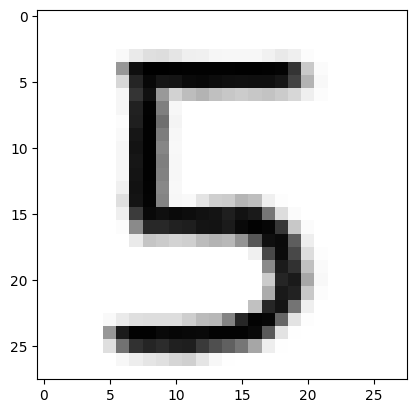

In [61]:
matplotlib.pyplot.imshow(our_own_dataset[0][1:].reshape(28, 28), cmap='Greys', interpolation='None')

In [62]:
# extract label and pixel data for image

label, img_data = our_own_dataset[0][0], our_own_dataset[0][1:]

output = n.query(img_data)

predicted_label = np.argmax(output)

# print actual and predicted labels to evaluate accuray

print(f"Actual Digit:", {label})
print(f"Predicted Digit:", {predicted_label})


# Additionally, print out confidence scores for each digit
print("Confidence Scores for each Digit:")
for i, score in enumerate(output.flatten(), start=0):
    print(f"Digit {i}: {score:.4f}")

# Highlight the digit with the highest confidence score
highest_confidence_score = np.max(output)
print(f"\nHighest Confidence Score: {highest_confidence_score:.4f} for Digit {predicted_label}")

Actual Digit: {5.0}
Predicted Digit: {5}
Confidence Scores for each Digit:
Digit 0: 0.0305
Digit 1: 0.0365
Digit 2: 0.0031
Digit 3: 0.1153
Digit 4: 0.0188
Digit 5: 0.9100
Digit 6: 0.0312
Digit 7: 0.0015
Digit 8: 0.1896
Digit 9: 0.0674

Highest Confidence Score: 0.9100 for Digit 5


In [63]:
import os
import numpy as np
import imageio.v3 as imageio
from PIL import Image

def preprocess_image(image_path):
    # Open the image file directly without resizing, assuming it is already 28x28
    img = Image.open(image_path)

    # Convert the image to grayscale ('L' stands for 'luminance')
    img_array = np.array(img.convert('L'))

    # Invert the image: in many image datasets, the digit is white on black background,
    # but we might want it black on white for processing
    img_data = 255.0 - img_array.flatten()

    # Normalize the image data to 0.01 - 1.0, as neural networks prefer
    img_data = (img_data / 255.0 * 0.99) + 0.01

    return img_data

# Directory containing images
image_directory = r'C:\Users\magic\Desktop\Neural Network\handwritten_dataset'

# Load all images from the directory
image_files = [os.path.join(image_directory, file) for file in os.listdir(image_directory) if file.endswith('.png')]

scorecard = []

for image_path in image_files:
    # Preprocess image without unnecessary resizing
    img_data = preprocess_image(image_path)

    # Query the model with the preprocessed image data
    output = n.query(img_data)

    # Extract the predicted label and the actual label
    predicted_label = np.argmax(output)
    actual_label = int(os.path.basename(image_path).split('_')[-1].split('.')[0])

    # Check if prediction is correct
    correct = int(predicted_label == actual_label)
    scorecard.append(correct)

    # Print actual and predicted labels to evaluate accuracy
    print(f"\nImage: {image_path}")
    print(f"Actual Digit: {actual_label}")
    print(f"Predicted Digit: {predicted_label}")
    print(f"Correct: {correct}")

    # Additionally, print out confidence scores for each digit
    print("Confidence Scores for each Digit:")
    for i, score in enumerate(output.flatten(), start=0):
        print(f"Digit {i}: {score:.4f}")

    # Highlight the digit with the highest confidence score
    highest_confidence_score = np.max(output)
    print(f"Highest Confidence Score: {highest_confidence_score:.4f} for Digit {predicted_label}")

# Calculate and print overall accuracy
accuracy = sum(scorecard) / len(scorecard)
print(f"\nOverall Accuracy: {accuracy:.4f}")



Image: C:\Users\magic\Desktop\Neural Network\handwritten_dataset\handwritten_2.png
Actual Digit: 2
Predicted Digit: 2
Correct: 1
Confidence Scores for each Digit:
Digit 0: 0.0078
Digit 1: 0.0024
Digit 2: 0.9496
Digit 3: 0.0429
Digit 4: 0.0263
Digit 5: 0.0032
Digit 6: 0.0149
Digit 7: 0.0005
Digit 8: 0.0040
Digit 9: 0.0055
Highest Confidence Score: 0.9496 for Digit 2

Image: C:\Users\magic\Desktop\Neural Network\handwritten_dataset\handwritten_3.png
Actual Digit: 3
Predicted Digit: 3
Correct: 1
Confidence Scores for each Digit:
Digit 0: 0.0007
Digit 1: 0.0954
Digit 2: 0.0094
Digit 3: 0.9900
Digit 4: 0.0021
Digit 5: 0.2152
Digit 6: 0.0005
Digit 7: 0.0179
Digit 8: 0.0071
Digit 9: 0.0125
Highest Confidence Score: 0.9900 for Digit 3

Image: C:\Users\magic\Desktop\Neural Network\handwritten_dataset\handwritten_5.png
Actual Digit: 5
Predicted Digit: 5
Correct: 1
Confidence Scores for each Digit:
Digit 0: 0.0305
Digit 1: 0.0365
Digit 2: 0.0031
Digit 3: 0.1153
Digit 4: 0.0188
Digit 5: 0.9100
Di